In [21]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/16.NiftyOptions/')

df_nifty=pd.read_csv('01.RawData/NiftyHistorical.csv',parse_dates=['Date'],index_col=['Date'])


In [64]:
df_nifty.loc[:,'Prev_Close']=df_nifty['Close'].shift(1)
df_nifty['Pct_Change']=100*(df_nifty['Close']/df_nifty['Prev_Close']-1)
bins=[-10,-1,-0.5,-0.25,0,0.25,0.5,1,10]
labels=['%d.(%0.2f,%0.2f)'%(i,x,y) for i,(x,y) in enumerate(zip(bins[:-1],bins[1:]))]
df_nifty['Pct_Change_Bin']=pd.cut(df_nifty['Pct_Change'],bins=bins,labels=labels)

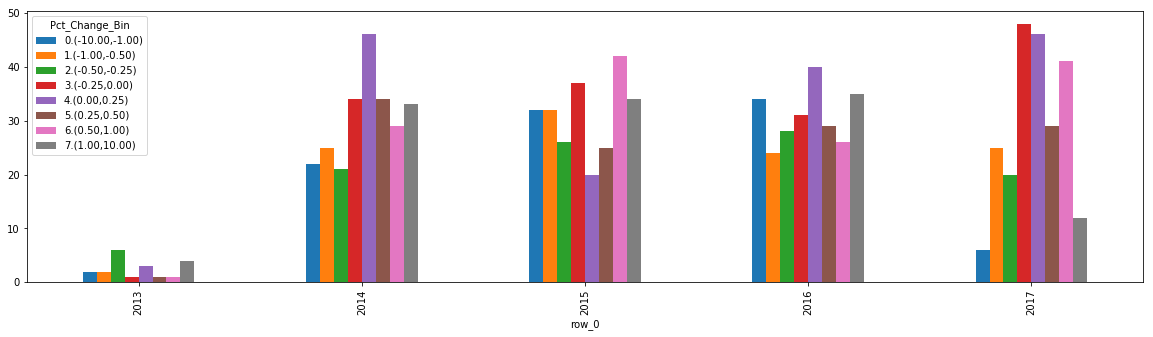

In [65]:
pd.crosstab(df_nifty.index.year,df_nifty['Pct_Change_Bin']).plot(kind='bar',figsize=(20,5))

In [50]:
df_nifty['Pct_Change_Bin']

Date
2013-12-02                 NaN
2013-12-03     2.(-0.50,-0.25)
2013-12-04     1.(-1.00,-0.50)
2013-12-05      6.(1.00,10.00)
2013-12-06       4.(0.25,0.50)
2013-12-09      6.(1.00,10.00)
2013-12-10     2.(-0.50,-0.25)
2013-12-11     2.(-0.50,-0.25)
2013-12-12    0.(-10.00,-1.00)
2013-12-13    0.(-10.00,-1.00)
2013-12-16      3.(-0.25,0.25)
2013-12-17     2.(-0.50,-0.25)
2013-12-18      6.(1.00,10.00)
2013-12-19     1.(-1.00,-0.50)
2013-12-20      6.(1.00,10.00)
2013-12-23      3.(-0.25,0.25)
2013-12-24     2.(-0.50,-0.25)
2013-12-26      3.(-0.25,0.25)
2013-12-27       5.(0.50,1.00)
2013-12-30     2.(-0.50,-0.25)
2013-12-31      3.(-0.25,0.25)
2014-01-01      3.(-0.25,0.25)
2014-01-02    0.(-10.00,-1.00)
2014-01-03      3.(-0.25,0.25)
2014-01-06     2.(-0.50,-0.25)
2014-01-07     2.(-0.50,-0.25)
2014-01-08      3.(-0.25,0.25)
2014-01-09      3.(-0.25,0.25)
2014-01-10      3.(-0.25,0.25)
2014-01-13      6.(1.00,10.00)
                    ...       
2017-10-18      3.(-0.25,0.25)
201

In [66]:
pd.Series(zip(df_nifty['Pct_Change_Bin'],df_nifty['Pct_Change_Bin'].shift(-1))).value_counts()[:10]

(4.(0.00,0.25), 4.(0.00,0.25))       27
(6.(0.50,1.00), 4.(0.00,0.25))       26
(7.(1.00,10.00), 4.(0.00,0.25))      24
(5.(0.25,0.50), 3.(-0.25,0.00))      24
(3.(-0.25,0.00), 6.(0.50,1.00))      23
(3.(-0.25,0.00), 1.(-1.00,-0.50))    22
(6.(0.50,1.00), 7.(1.00,10.00))      22
(3.(-0.25,0.00), 4.(0.00,0.25))      22
(3.(-0.25,0.00), 5.(0.25,0.50))      21
(4.(0.00,0.25), 7.(1.00,10.00))      20
dtype: int64

In [67]:
pd.Series(zip(df_nifty['Pct_Change_Bin'],df_nifty['Pct_Change_Bin'].shift(-1),df_nifty['Pct_Change_Bin'].shift(-2))).value_counts()[:20]

(6.(0.50,1.00), 7.(1.00,10.00), 4.(0.00,0.25))           8
(4.(0.00,0.25), 6.(0.50,1.00), 6.(0.50,1.00))            7
(6.(0.50,1.00), 6.(0.50,1.00), 4.(0.00,0.25))            7
(7.(1.00,10.00), 3.(-0.25,0.00), 0.(-10.00,-1.00))       6
(7.(1.00,10.00), 4.(0.00,0.25), 4.(0.00,0.25))           6
(6.(0.50,1.00), 4.(0.00,0.25), 2.(-0.50,-0.25))          6
(2.(-0.50,-0.25), 4.(0.00,0.25), 4.(0.00,0.25))          6
(6.(0.50,1.00), 4.(0.00,0.25), 5.(0.25,0.50))            6
(0.(-10.00,-1.00), 6.(0.50,1.00), 7.(1.00,10.00))        6
(5.(0.25,0.50), 3.(-0.25,0.00), 4.(0.00,0.25))           6
(0.(-10.00,-1.00), 3.(-0.25,0.00), 7.(1.00,10.00))       6
(5.(0.25,0.50), 3.(-0.25,0.00), 1.(-1.00,-0.50))         6
(1.(-1.00,-0.50), 7.(1.00,10.00), 4.(0.00,0.25))         6
(7.(1.00,10.00), 4.(0.00,0.25), 2.(-0.50,-0.25))         5
(3.(-0.25,0.00), 4.(0.00,0.25), 3.(-0.25,0.00))          5
(3.(-0.25,0.00), 3.(-0.25,0.00), 1.(-1.00,-0.50))        5
(4.(0.00,0.25), 7.(1.00,10.00), 2.(-0.50,-0.25))        

In [68]:
pd.Series(zip(df_nifty['Pct_Change_Bin'],df_nifty['Pct_Change_Bin'].shift(-1),df_nifty['Pct_Change_Bin'].shift(-2),df_nifty['Pct_Change_Bin'].shift(-3))).value_counts()[:10]

(6.(0.50,1.00), 4.(0.00,0.25), 2.(-0.50,-0.25), 5.(0.25,0.50))         3
(0.(-10.00,-1.00), 6.(0.50,1.00), 7.(1.00,10.00), 4.(0.00,0.25))       3
(3.(-0.25,0.00), 7.(1.00,10.00), 3.(-0.25,0.00), 0.(-10.00,-1.00))     3
(5.(0.25,0.50), 4.(0.00,0.25), 6.(0.50,1.00), 6.(0.50,1.00))           3
(6.(0.50,1.00), 6.(0.50,1.00), 4.(0.00,0.25), 5.(0.25,0.50))           3
(6.(0.50,1.00), 4.(0.00,0.25), 5.(0.25,0.50), 4.(0.00,0.25))           3
(3.(-0.25,0.00), 0.(-10.00,-1.00), 2.(-0.50,-0.25), 7.(1.00,10.00))    3
(6.(0.50,1.00), 7.(1.00,10.00), 5.(0.25,0.50), 3.(-0.25,0.00))         2
(7.(1.00,10.00), 4.(0.00,0.25), 6.(0.50,1.00), 7.(1.00,10.00))         2
(4.(0.00,0.25), 3.(-0.25,0.00), 4.(0.00,0.25), 4.(0.00,0.25))          2
dtype: int64

In [1]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/16.NiftyOptions/')

df_nifty=pd.read_csv('01.RawData/NiftyHistorical.csv',parse_dates=['Date'],index_col=['Date'])


In [9]:
from datetime import timedelta
high_low=[]
for date in df_nifty.index.tolist():
    close=df_nifty.loc[date,'Close']
    df=df_nifty[(df_nifty.index>date)&(df_nifty.index<=date+timedelta(days=60))]
    diff_upper=df['Close'].max()-close
    diff_lower=df['Close'].min()-close
    high_low.append([date,close,diff_upper,diff_lower])


In [14]:
df_diff=pd.DataFrame(high_low,columns=['date','close','diff_upper','diff_lower'])
df_diff.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
close,1027.0,8337.909640,1068.545966,6000.90,6076.378,6293.1550,6796.320,7763.8250,8284.50,8808.6500,9931.860,10278.2150,10647.508,11086.00
diff_upper,1026.0,391.892446,244.150103,-229.45,-75.950,9.0500,56.750,205.2000,392.50,555.1000,720.625,794.7375,961.200,1127.30
diff_lower,1026.0,-238.030604,263.311543,-1074.70,-975.325,-789.3875,-654.425,-369.1375,-162.25,-45.6125,24.400,60.3875,132.050,235.25


In [19]:
df_diff['year']=df_diff['date'].dt.year
df_diff['month']=df_diff['date'].dt.month
df_diff.groupby(['year','month'])['diff_lower'].mean().unstack().to_clipboard()

In [8]:
date+timedelta(days=60)

Timestamp('2014-01-31 00:00:00')